# Proyecto 1 del grupo 3: Desafío Empresarial - Análisis de Cohortes para los Pagos de Ironhack

## PARTICIPANTES

* Carla Fernández
* Jesús Ramírez
* Moisès Gómez 

## Introducción

IronHack Payments, una empresa de servicios financieros de vanguardia, ha estado ofreciendo soluciones innovadoras de adelanto de efectivo desde su creación en 2020. Con un compromiso de proporcionar adelantos de dinero gratuitos y precios transparentes, IronHack Payments ha logrado una base de usuarios sustancial. Como parte de su esfuerzo continuo por mejorar sus servicios y entender el comportamiento de los usuarios, IronHack Payments ha encargado un proyecto de análisis de cohortes.

## Visión General del Proyecto

En este proyecto hemos realizado un análisis de cohortes exhaustivo basado en datos proporcionados por IronHack Payments. El objetivo principal ha sido analizar cohortes de usuarios definidos por el mes de creación de su primer adelanto en efectivo, además hemos incluido una métrica adicional para complementar el análisis de cohorte. 

### Métricas a Analizar

Hemos basado nuestro análisis en las siguientes métricas:

1. **Frecuencia de Uso del Servicio:** Muestra con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de IronHack Payments a lo largo del tiempo.
2. **Tasa de Incidentes:** Determina la tasa de incidentes, enfocándose específicamente en los incidentes de pago, para cada cohorte. Identifica si hay variaciones en las tasas de incidentes entre diferentes cohortes.
3. **Ingresos Generados por la Cohorte:** Calcula el total de ingresos generados por cada cohorte a lo largo de los meses para evaluar el impacto financiero del comportamiento de los usuarios.
4. **Clasificación de los usuarios por frecuencia de uso del servicio:** Concocer el comportamiento de los usuarios segun la frecuencia permitirá a Iron Hack centrar esfuerzos en aquellos clientes que le resulten más interesantes para su negocio.

### Herramientas de Análisis de Datos

Hemos realizado el análisis de cohortes utilizando Python, y las bibliotecas de analisis de datos del entorno de Python, especialmente, Pandas y Seaborn.

### Análisis Exploratorio de Datos (EDA)

Antes del análisis de cohortes, hemos estado analizando los diferentes data sets que nos ha proporcionado el cliente, asi como una hoja de calculo que nos ha servido de guión para interpretar las cabeceras.
Con todo ello, hemos empezado a lanzar algunas visualizaciones para ir entendiendo como se realacionaban. 

### Análisis de la Calidad de Datos

Durante el análisis hemos podido ver que todas las entradas de los data sets estan realcionadas por un identificador de usuario del servicio. XXXXXXXXXX
Evalúa la calidad del conjunto de datos identificando valores faltantes, inconsistencias en los datos y posibles errores. Implementa pasos de limpieza y preprocesamiento de datos para garantizar la fiabilidad de tu análisis. Documenta cualquier problema de calidad de datos encontrado y los pasos tomados para abordarlos.

### Contenido de este Notebook:

El resultado de este proyecto se compone de los siguientes elementos, incluidos en este documento:

1. **Código en Python** 
2. **Informe de Análisis Exploratorio de Datos** 
3. **Informe de Análisis de la Calidad de Datos** 

# Preparación de los datos

En esta sección incluimos detalles de la exploración inicial de datos. Inicialmente importaremos la bibliotecas, cargaremos los datasets y haremos una primera visualización de los datos.

In [5]:
#importacion de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Carga de los datasets
cash = pd.read_csv("./project_dataset/extract - cash request - data analyst.csv")
fees = pd.read_csv("./project_dataset/extract - fees - data analyst - .csv")

# Análisis exploratorio de Cash

A continuación vamos a hacer una primera exploración del dataset **Cash** que va a incluir la descripción de sus columnas y una primera observación de sus datos.

## Contenido de la Hoja de Cálculo para Cash

```
Column name	Description
id	Unique ID of Cash Request
amount	Amount of the Cash Request
status	"Status of the CR.
Possibles values are : 
- approved : CR is a 'regular' one (= without fees) and was approved either automatically or manually. Funds will be sent aprox. 7 days after the creation
- money_sent : We transferred the fund to the customer account. Will change to active once we detect that the user received the funds (using user's bank history)
- rejected : The CR needed a manual review and was rejected
- pending : The CR is pending a manual review from an analyst
- transaction_declined : We failed to send the funds to the customer
- waiting_user_confirmation : The user needs to confirm in-app that he want the CR (for legal reasons)
- direct_debit_rejected : Our last attempt of SEPA direct debit to charge the customer was rejected 
- canceled : The user didn't confirm the cash request in-app, we automatically canceled it
- direct_debit_sent : We sent/scheduled a SEPA direct debit to charge the customer account. The result of this debit is not yet confirmed
- waiting_reimbursement : We were not able to estimate a date of reimbursement, the user needs to choose one in the app.
- active : Funds were received on the customer account.
- money_back : The CR was successfully reimbursed."
reason	Filled only if the CR was manually reviewed and rejected. That's the rejection's reason displayed in-app.
created_at	Timestamp of the CR creation
updated_at	Timestamp of the latest CR's details update (= update of at least one column in this table)
user_id	Unique ID of the user who requested the cash advance
moderated_at	Timestamp of the manual review. Only filled if the CR needed a manual review
deleted_account_id	If a user delete his account, we are replacing the user_id by this id. It corresponds to a unique ID in the deleted account table with some keys information saved for fraud-fighting purposes (while respecting GDPR regulation)
reimbursement_date	Planned reimbursement date. The user card will be charged at this date.
cash_request_debited_date	Filled only if a SEPA direct debit was sent. It's the date were the latest direct debit was seen on the user account.
cash_request_received_date	Date of the receipt of the CR. Based on user's bank history.
money_back_date	Date where the CR was considered as money back. It's either the paid_by_card date or the date were we considered that's the direc debit have low odds to be rejected (based on business rules) 
transfer_type	Instant = user choose not received the advance instantly . Regular = user choose to not pay and wait for the transfer
send_at	Timestamp of the funds's transfer
recovery_status	"Null if the cash request never had a payment incident.
- completed : the payment incident was resolved (=the cash request was reimbursed)
- pending : the payment incident still open
- pending_direct_debit : the payment incident still open but a SEPA direct debit is launched"
reco_creation	Timestamp of the recovery creation
reco_last_update	Timestamp of the last recovery case update. Can be used to determine the incident closure date.


```

In [9]:
# Primera visualización del contenido de cash
cash.sample(10)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
22253,12155,100.0,money_back,2020-08-12 10:19:31.368321+00,2020-12-18 13:13:30.294976+00,5280.0,NaN,NaN,2020-09-01 22:00:00+00,2020-08-21,2020-09-01 22:00:00+00,regular,2020-08-19 10:19:31.367712+00,NaN,NaN,NaN
4721,12075,80.0,rejected,2020-08-11 20:56:40.040716+00,2020-08-12 09:58:48.641492+00,10370.0,2020-08-12 09:58:48.638921+00,NaN,2020-09-07 22:00:00+00,NaN,NaN,instant,2020-08-18 20:56:40.040313+00,NaN,NaN,NaN
13985,7031,100.0,money_back,2020-07-07 22:47:08.663155+00,2020-12-18 13:09:59.045209+00,18376.0,2020-07-08 13:27:29.238362+00,NaN,2020-08-05 22:00:00+00,2020-07-10,2020-08-05 22:00:00+00,regular,NaN,NaN,NaN,NaN
9657,20846,100.0,money_back,2020-10-13 11:46:37.885406+00,2021-01-03 01:54:52.48926+00,36546.0,NaN,NaN,2020-11-04 22:00:00+00,2020-10-15,2021-01-03 01:54:52.435741+00,instant,2020-10-13 13:43:16.433609+00,completed,2020-11-15 22:14:52.160543+00,2021-01-03 01:54:52.441171+00
1223,2236,100.0,money_back,2020-05-28 10:06:12.786462+00,2020-06-17 11:04:41.668977+00,9675.0,2020-05-28 11:22:26.174908+00,NaN,2020-06-15 22:00:00+00,2020-05-29,2020-06-17 11:04:41.668721+00,regular,NaN,NaN,NaN,NaN
9846,25049,25.0,direct_debit_rejected,2020-10-27 10:14:49.615737+00,2020-11-22 22:07:45.924148+00,92214.0,NaN,NaN,2020-11-11 23:51:00+00,2020-10-28,NaN,instant,2020-10-27 10:15:09.30186+00,pending,2020-11-22 22:07:43.232295+00,2020-11-22 22:07:45.942211+00
23663,22377,50.0,money_back,2020-10-20 08:42:18.890812+00,2020-12-18 13:15:52.241104+00,NaN,NaN,24529.0,2020-11-02 22:00:00+00,2020-10-20,2020-11-02 19:50:53.849447+00,instant,2020-10-20 08:42:31.651295+00,NaN,NaN,NaN
16100,15531,100.0,money_back,2020-09-10 11:43:12.11605+00,2020-12-18 13:10:46.324668+00,21853.0,NaN,NaN,2020-10-05 22:00:00+00,2020-09-19,2020-10-06 19:39:02.681863+00,regular,2020-09-17 11:43:12.069457+00,NaN,NaN,NaN
20744,26488,50.0,money_back,2020-10-30 17:59:01.651812+00,2020-12-18 13:12:38.052862+00,99604.0,NaN,NaN,2020-11-09 17:59:30.454666+00,2020-10-31,2020-11-12 23:00:00+00,instant,2020-10-30 17:59:30.454666+00,NaN,NaN,NaN
14411,16345,100.0,money_back,2020-09-16 05:46:24.488864+00,2020-12-18 13:10:09.974455+00,18635.0,NaN,NaN,2020-10-15 22:00:00+00,2020-09-22,2020-10-16 19:24:13.74305+00,instant,2020-09-23 05:46:24.447876+00,NaN,NaN,NaN


In [100]:
cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          23970 non-null  int64   
 1   amount                      23970 non-null  float64 
 2   status                      23970 non-null  object  
 3   created_at                  23970 non-null  object  
 4   updated_at                  23970 non-null  object  
 5   user_id                     21867 non-null  float64 
 6   moderated_at                16035 non-null  object  
 7   deleted_account_id          2104 non-null   float64 
 8   reimbursement_date          23970 non-null  object  
 9   cash_request_received_date  16289 non-null  object  
 10  money_back_date             16543 non-null  object  
 11  transfer_type               23970 non-null  object  
 12  send_at                     16641 non-null  object  
 13  recovery_status 

In [102]:
cash.describe()

,id,amount,user_id,deleted_account_id,unified_user_id
count,23970.000000,23970.000000,21867.000000,2104.000000,23970.000000
mean,13910.966124,82.720818,32581.250789,9658.755228,30570.545265
std,7788.117214,26.528065,27618.565773,7972.743249,27266.706244
min,3.000000,1.000000,34.000000,91.000000,34.000000
25%,7427.250000,50.000000,10804.000000,3767.000000,9269.000000
50%,14270.500000,100.000000,23773.000000,6121.500000,21465.000000
75%,20607.750000,100.000000,46965.000000,16345.000000,43198.500000
max,27010.000000,200.000000,103719.000000,30445.000000,103719.000000


En este primer análisis podemos observar que en el dataset de Cash que existen algunas filas que no tienen algunos de los elementos, es significativo que el user_id tiene elementos nulos.
Analizando podemos ver que el user_id se complementa con el deleted_account_id, para tener todos los datos completos.

## Contenido de la Hoja de Cálculo para Fees

```
Column name	Description

* id	Unique ID of the fee object
* type	"Type of fee
* Possible values are :
* instant_payment : fees for instant cash request (send directly after user's request, through SEPA Instant Payment) 
* split_payment : futures fees for split payment (in case of an incident, we'll soon offer the possibility to our users to reimburse in multiples installements)
* incident : fees for failed reimbursement. Created after a failed direct debit
* postpone : fees created when a user want to postpone the reimbursment of a CR"
* status	"Status of the fees (= does the fees was successfully charged)

Possibles values are : 
- confirmed : the user made an action who created a fee. It will normally get charged at the moment of the CR's reimbursement. In some rare cases, postpones are confirmed without being charges due to a commercial offer.
- rejected : the last attempt to charge the fee failed.
- cancelled : fee was created and cancelled for some reasons. It's used to fix issues with fees but it mainly concern postpone fees who failed. We are charging the fees at the moment of the postpone request. If it failed, the postpone is not accepted and the reimbursement date still the same.
- accepted : fees were successfully charged"
category	"Describe the reason of the incident fee.

2 possibles values : 

- rejected_direct_debit : fees created when user's bank rejects the first direct debit
- month_delay_on_payment : fees created every month until the incident is closed"
reason	Description of the fee
created_at	Timestamp of the fee's creation
updated_at	Timestamp of the latest fee's details update
paid_at	Timestamp of the fee's payment
from_date	Apply only to postpone fees. Initial date of reimbursement for the CR
to_date	Apply only to postpone fees. New date of reimbursement for the CR
cash_request_id	Unique ID of the CR linked to this fee
total_amount	Amount of the fee (including VAT)
charge_moment	"When the fee will be charge.

2 possibles values : 
- before : the fee should be charged at the moment of its creation
- after : the fee should be charged at the moment of the CR's reimbursement"
```

In [94]:
# Primera visualización del contenido de fees
fees.sample(10)

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
19771,2341,2641.0,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-07-29 23:10:56.642815+00,2020-12-04 12:16:59.097199+00,2020-09-03 14:20:26+00,NaN,NaN,after
1071,14824,22170.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 22170,2020-10-19 13:40:07.274185+00,2020-10-19 13:40:07.274219+00,2020-11-04 20:32:13.542849+00,NaN,NaN,after
6605,17184,24197.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 24197,2020-10-24 20:23:26.848858+00,2020-10-24 20:23:26.848887+00,2020-11-05 20:49:51.843767+00,NaN,NaN,after
6093,8182,16743.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 16743,2020-09-18 12:45:56.693974+00,2020-10-13 14:25:12.286639+00,2020-11-05 14:17:30.33182+00,NaN,NaN,after
18869,16243,23319.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23319,2020-10-23 08:39:53.491344+00,2020-10-23 08:39:53.491377+00,2020-11-09 19:08:06.090219+00,NaN,NaN,after
70,15879,22977.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 22977,2020-10-22 09:52:58.258306+00,2020-10-22 09:52:58.258331+00,2020-11-02 19:54:34.031162+00,NaN,NaN,after
14718,8648,17238.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 17238,2020-09-22 11:18:27.019522+00,2020-10-13 14:25:13.036502+00,2020-11-28 20:50:19.827074+00,NaN,NaN,after
20298,11788,13140.0,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-10-07 22:23:56.492708+00,2020-10-13 14:25:18.126224+00,NaN,NaN,NaN,after
9306,16700,23220.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23220,2020-10-23 19:57:02.859084+00,2020-10-23 19:57:02.859112+00,2020-11-06 19:20:33.424973+00,NaN,NaN,after
7629,19442,14673.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-28 22:24:03.832807+00,2020-10-28 22:24:03.832845+00,2021-02-05 17:25:44.823587+00,NaN,NaN,after


In [13]:
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [15]:
fees['total_amount'].describe()

count    21061.000000
mean         5.000237
std          0.034453
min          5.000000
25%          5.000000
50%          5.000000
75%          5.000000
max         10.000000
Name: total_amount, dtype: float64

En este primer análisis del dataframe de **fees** podemos observar que tiene 13 columnas y muchas de ellas tiene valor None.

Analizando los diferentes valores del total amount, nos encontramos que tienen dos tipos de valores: 10.0 y 5.0.

In [16]:
fees.groupby('total_amount').count()

,id,cash_request_id,type,status,category,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
total_amount,,,,,,,,,,,,
5.0,21060,21056,21060,21060,2196,21060,21060,21060,15530,7766,7766,21060
10.0,1,1,1,1,0,1,1,1,1,0,0,1


Analizamos los diferentes estados, y observamos que el estado de accepted es mayoritario pero el resto podria servirnos para analizar incidencias.

In [18]:
fees.groupby('status').count()

,id,cash_request_id,type,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
status,,,,,,,,,,,,
accepted,14841,14841,14841,1560,14841,14841,14841,14841,14523,2985,2985,14841
cancelled,4938,4934,4938,97,4938,4938,4938,4938,90,4780,4780,4938
confirmed,88,88,88,19,88,88,88,88,2,0,0,88
rejected,1194,1194,1194,520,1194,1194,1194,1194,916,1,1,1194


Consideramos las columnas pueden tener compartidas los dos datasets:
Según la descripción de la hoja de cálculo, sabemos que ninguna de las cuatro corresponden al mismo concepto, ya que se refieren a registros independientes.

In [20]:
set(cash.columns) & set(fees.columns)

{'created_at', 'id', 'status', 'updated_at'}

Localizamos un usuario 231.0 que nos permita hacer validaciones posteriores.

Podemos ver que este usuario dispone de dos peticionens que han sido rechazadas y unas cuantas que han sido aceptadas.

In [23]:
cash[cash['user_id'] == 231.0]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
434,1293,100.0,rejected,2020-04-20 01:47:15.38493+00,2020-04-20 09:09:02.1137+00,231.0,2020-04-20 09:09:02.109199+00,NaN,2020-05-02 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1380,2933,100.0,money_back,2020-06-10 18:26:50.085351+00,2020-12-18 13:08:36.317354+00,231.0,2020-06-11 11:19:13.12836+00,NaN,2020-07-17 22:00:00+00,2020-06-13,2020-07-19 22:00:00+00,regular,NaN,NaN,NaN,NaN
1392,1461,100.0,money_back,2020-04-29 22:27:17.998022+00,2020-06-10 16:05:03.1476+00,231.0,2020-04-30 10:44:40.99108+00,NaN,2020-06-01 22:00:00+00,2020-05-05,2020-06-10 16:05:03.147262+00,regular,NaN,NaN,NaN,NaN
9104,769,100.0,money_back,2020-02-29 15:33:39.425986+00,2020-11-04 12:55:55.465728+00,231.0,2020-02-29 15:35:42.000663+00,NaN,2020-04-05 22:00:00+00,2020-03-02,2020-04-14 20:26:02.498434+00,regular,NaN,NaN,NaN,NaN
9218,396,100.0,money_back,2020-01-07 16:40:50.839262+00,2020-11-04 12:55:12.047839+00,231.0,2020-01-08 09:17:46.917255+00,NaN,2020-02-11 23:00:00+00,2020-01-10,NaN,regular,NaN,NaN,NaN,NaN
13079,9291,100.0,money_back,2020-07-21 16:42:30.71593+00,2020-12-18 13:09:40.955221+00,231.0,2020-07-21 17:46:22.989524+00,NaN,2020-07-30 22:00:00+00,2020-07-23,2020-07-30 22:00:00+00,regular,2020-07-28 16:42:30.715508+00,NaN,NaN,NaN
14684,10563,100.0,money_back,2020-08-02 12:18:49.662247+00,2020-12-18 13:10:17.051826+00,231.0,2020-08-02 16:22:11.247348+00,NaN,2020-09-01 22:00:00+00,2020-08-05,2020-09-01 22:00:00+00,regular,2020-08-09 12:18:49.661783+00,NaN,NaN,NaN
18491,19968,100.0,money_back,2020-10-09 01:08:17.542886+00,2020-12-18 13:11:44.328981+00,231.0,NaN,NaN,2020-10-30 22:00:00+00,2020-10-09,2020-11-03 23:00:00+00,instant,2020-10-09 01:08:34.096632+00,NaN,NaN,NaN
22075,14484,100.0,money_back,2020-09-04 08:27:22.790976+00,2020-12-18 13:13:18.258385+00,231.0,NaN,NaN,2020-09-30 22:00:00+00,2020-09-05,2020-10-06 22:00:00+00,instant,2020-09-11 08:27:22.732887+00,NaN,NaN,NaN



# Métrica 1

Frecuencia de Uso del Servicio: Comprender con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de IronHack Payments a lo largo del tiempo.


El cálculo de esta métrica unicamente tenemos en cuenta los datos de cash, este es el pseudocódigo:

a. Calcular el año-mes (año y mes a partir created_at)
  * Esto nos servirá tanto para poder clasificar el cash request de todo un mes y para poder calcular el cohorte.
  * Consideramos que si es nulo el created_at, no se ha hecho el préstamo.

b. Unir el user_id y  delted_account_id para tener un id de usuario en todos los registros
  * al usuario unificado le llamamos: *unified_user_id*
  * comprobar que no queden nulos
 
c. Encontrar el cohorte de cada usuario 
   * el cohorte corresponde al año-mes del created_at mas antigua de los pedidos de cada usuario.
   * el cohorte agrupa a los usuarios según el primer uso que han hecho del servicio.
   * comprobar que todos los usuarios tienen cohorte
     
d. Encontrar el número de préstamos de un usuario
   * el total count de préstamos de cada usuario que tenga cohorte

e. Asociar a cada cohorte la frecuencia
   * generar charts

In [120]:
# Creamos una columna con el año-mes

cash['año_mes'] = pd.to_datetime(cash['created_at']).dt.strftime('%Y-%m')
cash.sample(10)



,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,año_mes,unified_user_id,cohorte,clasificacion
9256,23734,50.0,money_back,2020-10-23 18:08:13.793816+00,2021-01-07 20:16:22.090497+00,12495.0,NaN,NaN,2021-01-07 11:00:00+00,2020-11-03,2021-01-07 20:16:22.061656+00,regular,2020-10-30 18:08:13.790022+00,NaN,NaN,NaN,2020-10,12495.0,2020-10,Ocasional
6758,16751,50.0,rejected,2020-09-18 12:56:22.64424+00,2020-09-18 15:46:12.213611+00,5013.0,2020-09-18 15:46:12.205387+00,NaN,2020-10-05 22:00:00+00,NaN,NaN,regular,2020-09-25 12:56:22.588093+00,NaN,NaN,NaN,2020-09,5013.0,2020-07,Frecuente
20046,22258,50.0,money_back,2020-10-19 19:37:45.396606+00,2020-12-18 13:12:22.451738+00,73210.0,NaN,NaN,2020-11-05 22:00:00+00,2020-10-21,2020-11-05 08:00:39.279426+00,instant,2020-10-19 19:38:09.074728+00,NaN,NaN,NaN,2020-10,73210.0,2020-10,Ocasional
11288,4679,100.0,money_back,2020-06-22 16:51:52.511474+00,2020-12-18 13:09:01.828485+00,20243.0,2020-06-23 10:22:01.020715+00,NaN,2020-07-20 22:00:00+00,2020-06-25,2020-07-07 22:00:00+00,regular,NaN,NaN,NaN,NaN,2020-06,20243.0,2020-06,Frecuente
2301,4912,100.0,rejected,2020-06-24 06:07:10.868012+00,2020-06-24 11:11:27.378162+00,20552.0,2020-06-24 11:11:27.372263+00,NaN,2020-07-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-06,20552.0,2020-06,Frecuente
23894,24782,25.0,money_back,2020-10-26 17:40:09.533583+00,2020-12-18 13:16:51.97826+00,46841.0,NaN,NaN,2020-11-04 23:51:00+00,2020-10-28,2020-12-17 13:10:37.180044+00,instant,2020-10-26 17:40:16.301475+00,completed,2020-11-18 22:20:21.421757+00,2020-12-17 13:10:37.184693+00,2020-10,46841.0,2020-09,Recurrente
14263,11933,50.0,money_back,2020-08-11 10:23:44.754248+00,2020-12-18 13:10:04.869801+00,12537.0,2020-08-11 10:29:10.588115+00,NaN,2020-09-04 22:00:00+00,2020-08-12,2020-09-04 19:35:07.369278+00,instant,2020-08-18 10:23:44.75389+00,NaN,NaN,NaN,2020-08,12537.0,2020-07,Frecuente
2278,7731,100.0,rejected,2020-07-13 04:47:22.881447+00,2020-07-13 06:40:48.081306+00,19790.0,2020-07-13 06:40:48.078919+00,NaN,2020-08-06 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-07,19790.0,2020-06,Frecuente
16127,24039,25.0,money_back,2020-10-24 11:45:35.518983+00,2020-12-18 13:10:46.718702+00,81281.0,NaN,NaN,2020-11-08 12:45:28.871+00,2020-10-25,2020-11-08 19:11:09.14149+00,instant,2020-10-24 11:50:06.531004+00,NaN,NaN,NaN,2020-10,81281.0,2020-10,Ocasional
7687,1139,100.0,money_back,2020-04-11 09:51:17.536203+00,2020-11-04 12:55:22.319742+00,680.0,2020-04-13 08:51:11.105396+00,NaN,2020-05-03 22:00:00+00,2020-04-15,2020-05-12 20:20:38.319693+00,regular,NaN,NaN,NaN,NaN,2020-04,680.0,2020-03,Frecuente


In [131]:
# 1a. Estudiamos cálculo de año-mes
total_filas = len(cash)
print(f"El total de filas es: {total_filas}")
print("Comprobamos que no hay nulos en el cash.created_at, ya que el numero de año_mes no nulos es el esperado:", (len(cash["año_mes"])))

El total de filas es: 23970
Comprobamos que no hay nulos en el cash.created_at, ya que el numero de año_mes no nulos es el esperado: 23970


In [135]:
# 1b. Unificamos el user_id con el delete_account_id.
cash['unified_user_id'] = cash['user_id'].fillna(cash['deleted_account_id'])
cash.sample(10)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,año_mes,unified_user_id,cohorte,clasificacion
23898,13685,100.0,money_back,2020-08-23 16:49:01.348801+00,2020-12-18 13:10:32.014421+00,NaN,NaN,27563.0,2020-10-03 22:00:00+00,2020-08-24,2020-10-04 19:27:50.917877+00,instant,2020-08-30 16:49:01.295793+00,NaN,NaN,NaN,2020-08,27563.0,2020-06,Frecuente
18911,14277,100.0,money_back,2020-09-02 12:29:06.705314+00,2020-12-18 13:11:54.351691+00,2424.0,NaN,NaN,2020-11-28 11:00:00+00,2020-09-04,2020-11-28 19:38:23.28222+00,instant,2020-09-09 12:29:06.644602+00,NaN,NaN,NaN,2020-09,2424.0,2020-08,Recurrente
22611,18844,100.0,money_back,2020-10-02 09:04:22.497952+00,2020-12-18 13:13:48.769326+00,54519.0,NaN,NaN,2020-11-03 22:00:00+00,2020-10-03,2020-11-03 19:37:16.704853+00,instant,2020-10-09 09:04:22.445771+00,NaN,NaN,NaN,2020-10,54519.0,2020-10,Ocasional
1401,3293,100.0,rejected,2020-06-14 12:52:55.640351+00,2020-06-15 08:46:38.083298+00,15020.0,2020-06-15 08:46:38.078915+00,NaN,2020-07-03 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-06,15020.0,2020-06,Frecuente
13860,12827,100.0,money_back,2020-08-17 17:47:09.561544+00,2020-12-18 13:09:57.148349+00,11438.0,2020-08-18 08:24:49.292802+00,NaN,2020-09-03 17:47:09.524085+00,2020-08-21,2020-09-03 19:00:24.701975+00,instant,2020-08-24 17:47:09.524085+00,NaN,NaN,NaN,2020-08,11438.0,2020-08,Frecuente
15318,14781,50.0,money_back,2020-09-06 08:30:51.091624+00,2020-12-18 13:10:31.527525+00,17612.0,2020-09-06 11:40:10.952954+00,NaN,2020-11-03 23:00:00+00,2020-09-08,2020-11-05 10:59:53.693861+00,instant,2020-09-13 08:30:51.04931+00,NaN,NaN,NaN,2020-09,17612.0,2020-06,Recurrente
8127,965,100.0,money_back,2020-03-21 04:37:55.269396+00,2020-11-04 12:55:07.914496+00,3160.0,2020-03-21 09:50:52.076794+00,NaN,2020-04-13 22:00:00+00,2020-03-24,2020-04-22 20:51:34.559339+00,regular,NaN,NaN,NaN,NaN,2020-03,3160.0,2020-03,Frecuente
16789,17022,50.0,money_back,2020-09-21 01:39:50.689377+00,2020-12-18 13:11:02.553751+00,2186.0,2020-09-21 08:17:39.28328+00,NaN,2020-10-07 22:00:00+00,2020-09-29,2020-10-08 19:07:59.394132+00,regular,2020-09-28 01:39:50.628468+00,NaN,NaN,NaN,2020-09,2186.0,2019-12,Frecuente
14741,13332,80.0,money_back,2020-08-20 11:13:46.576372+00,2020-12-18 13:10:18.216056+00,15579.0,NaN,NaN,2020-09-28 22:00:00+00,2020-08-22,2020-09-29 19:55:21.45986+00,instant,2020-08-27 11:13:46.533603+00,NaN,NaN,NaN,2020-08,15579.0,2020-06,Frecuente
16373,15843,100.0,money_back,2020-09-12 11:30:11.699988+00,2020-12-18 13:10:51.813706+00,2011.0,2020-09-12 13:20:28.942918+00,NaN,2020-10-05 22:00:00+00,2020-09-13,2020-10-06 19:41:53.395349+00,instant,2020-09-19 11:30:11.650757+00,NaN,NaN,NaN,2020-09,2011.0,2019-12,Frecuente


In [29]:
# Comprobamos si han quedado NaNs en unified_user_id
print(f"unified_user_id: no nulos {cash['unified_user_id'].notna().sum()} y nulos {cash['unified_user_id'].isna().sum()}")

unified_user_id: no nulos 23970 y nulos 0


In [30]:
# 1c. Encontrar el cohorte de cada usuario (es el primer préstamo)
# Agrupamos por unified_user_id

user_cohorte = cash.groupby('unified_user_id')['año_mes'].min()  
print("Cohortes por usuario")
print(user_cohorte.head(10))

# Comprobemos que el usuario 231 tenga la cohorte esperada (2020-01 y no 2019-12 porque está rejected)
print("Comprobación del cohorte conocido para el usuario 231. Se espera 2020-01")
print(user_cohorte[231])

print(f"El número total de usuarios con cohorte es {len(user_cohorte)} de los {cash['unified_user_id'].count()} usuarios originales")

Los diferentes status son: ['rejected' 'money_back' 'canceled' 'active' 'direct_debit_rejected'
 'transaction_declined' 'direct_debit_sent']
Cohortes por usuario
unified_user_id
34.0    2020-04
35.0    2019-12
47.0    2019-11
52.0    2019-12
53.0    2019-12
66.0    2020-04
68.0    2019-12
70.0    2020-04
72.0    2020-01
73.0    2020-01
Name: año_mes, dtype: object
Comprobación del cohorte conocido para el usuario 231. Se espera 2020-01
2019-12
El número total de usuarios con cohorte es 11793 de los 23970 usuarios originales


In [33]:
# El objetivo es conseguir un dataframe que contenga la cohorte real de cada usuario y el mes real en el que se está realizando el pedido

In [34]:
cash['cohorte'] = cash['unified_user_id'].map(user_cohorte)
cash[cash['unified_user_id'] == 231]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,año_mes,unified_user_id,cohorte
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,231.0,2019-12
434,1293,100.0,rejected,2020-04-20 01:47:15.38493+00,2020-04-20 09:09:02.1137+00,231.0,2020-04-20 09:09:02.109199+00,NaN,2020-05-02 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-04,231.0,2019-12
1380,2933,100.0,money_back,2020-06-10 18:26:50.085351+00,2020-12-18 13:08:36.317354+00,231.0,2020-06-11 11:19:13.12836+00,NaN,2020-07-17 22:00:00+00,2020-06-13,2020-07-19 22:00:00+00,regular,NaN,NaN,NaN,NaN,2020-06,231.0,2019-12
1392,1461,100.0,money_back,2020-04-29 22:27:17.998022+00,2020-06-10 16:05:03.1476+00,231.0,2020-04-30 10:44:40.99108+00,NaN,2020-06-01 22:00:00+00,2020-05-05,2020-06-10 16:05:03.147262+00,regular,NaN,NaN,NaN,NaN,2020-04,231.0,2019-12
9104,769,100.0,money_back,2020-02-29 15:33:39.425986+00,2020-11-04 12:55:55.465728+00,231.0,2020-02-29 15:35:42.000663+00,NaN,2020-04-05 22:00:00+00,2020-03-02,2020-04-14 20:26:02.498434+00,regular,NaN,NaN,NaN,NaN,2020-02,231.0,2019-12
9218,396,100.0,money_back,2020-01-07 16:40:50.839262+00,2020-11-04 12:55:12.047839+00,231.0,2020-01-08 09:17:46.917255+00,NaN,2020-02-11 23:00:00+00,2020-01-10,NaN,regular,NaN,NaN,NaN,NaN,2020-01,231.0,2019-12
13079,9291,100.0,money_back,2020-07-21 16:42:30.71593+00,2020-12-18 13:09:40.955221+00,231.0,2020-07-21 17:46:22.989524+00,NaN,2020-07-30 22:00:00+00,2020-07-23,2020-07-30 22:00:00+00,regular,2020-07-28 16:42:30.715508+00,NaN,NaN,NaN,2020-07,231.0,2019-12
14684,10563,100.0,money_back,2020-08-02 12:18:49.662247+00,2020-12-18 13:10:17.051826+00,231.0,2020-08-02 16:22:11.247348+00,NaN,2020-09-01 22:00:00+00,2020-08-05,2020-09-01 22:00:00+00,regular,2020-08-09 12:18:49.661783+00,NaN,NaN,NaN,2020-08,231.0,2019-12
18491,19968,100.0,money_back,2020-10-09 01:08:17.542886+00,2020-12-18 13:11:44.328981+00,231.0,NaN,NaN,2020-10-30 22:00:00+00,2020-10-09,2020-11-03 23:00:00+00,instant,2020-10-09 01:08:34.096632+00,NaN,NaN,NaN,2020-10,231.0,2019-12
22075,14484,100.0,money_back,2020-09-04 08:27:22.790976+00,2020-12-18 13:13:18.258385+00,231.0,NaN,NaN,2020-09-30 22:00:00+00,2020-09-05,2020-10-06 22:00:00+00,instant,2020-09-11 08:27:22.732887+00,NaN,NaN,NaN,2020-09,231.0,2019-12


In [35]:
# EL objetivo es obtener los pedidos por mes
adelantos_mes_serie = cash.groupby(['año_mes','cohorte'])['año_mes'].count() 
adelantos_mes = adelantos_mes_serie.to_frame(name='adelantos').reset_index()
adelantos_mes

,año_mes,cohorte,adelantos
0,2019-11,2019-11,1
1,2019-12,2019-11,1
2,2019-12,2019-12,288
3,2020-01,2019-12,106
4,2020-01,2020-01,117
...,...,...,...
78,2020-11,2020-07,7
79,2020-11,2020-08,10
80,2020-11,2020-09,20
81,2020-11,2020-10,15


1e. Con todos los datos calculados, empezamos a mostrar graficas.

In [ ]:
De las que hemos ido extrayendo las más interesantes nos parecen las siguientes:

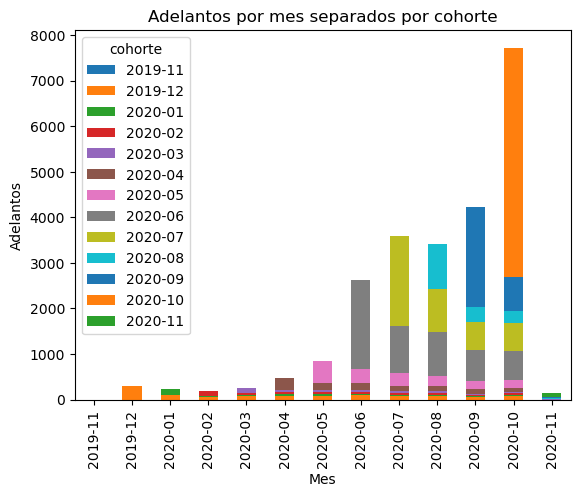

In [36]:
df_pivot = adelantos_mes.pivot(index='año_mes', columns='cohorte', values='adelantos').fillna(0)
df_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Mes')
plt.ylabel('Adelantos')
plt.title('Adelantos por mes separados por cohorte')
plt.show()

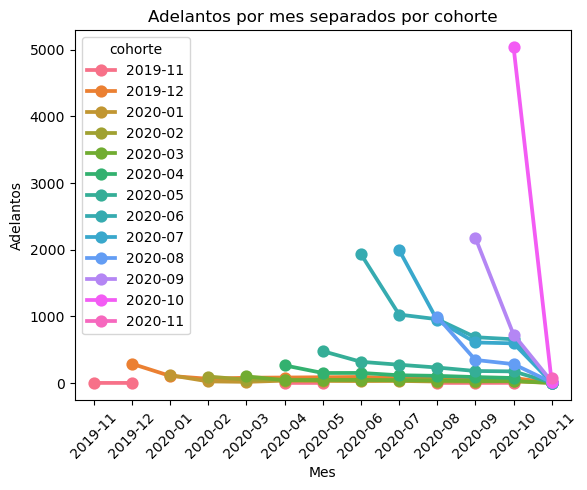

In [37]:
sns.pointplot(data=adelantos_mes, x='año_mes', y='adelantos', hue='cohorte', marker='o')
plt.title('Adelantos por mes separados por cohorte')
plt.xlabel('Mes')
plt.ylabel('Adelantos')
plt.xticks(rotation=45)
plt.show()

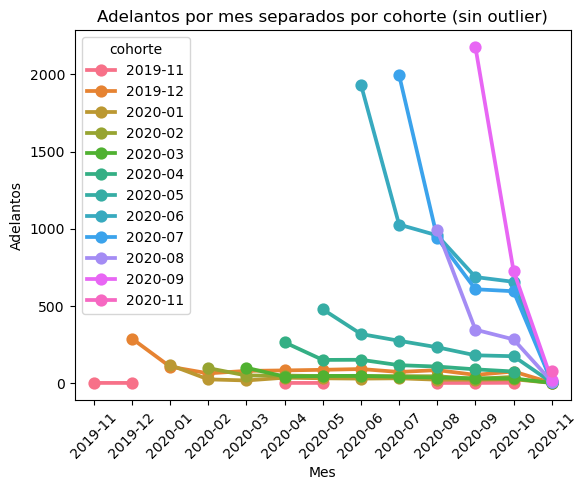

In [38]:
# Eliminemos el outlier (cohorte 2020-10) para que no oculte el resto
adelantos_mes_sin_outlier = adelantos_mes[adelantos_mes['cohorte'] != '2020-10']
sns.pointplot(data=adelantos_mes_sin_outlier, x='año_mes', y='adelantos', hue='cohorte', marker='o')
plt.title('Adelantos por mes separados por cohorte (sin outlier)')
plt.xlabel('Mes')
plt.ylabel('Adelantos')
plt.xticks(rotation=45)
plt.show()

## Conclusión

El uso del servicio esta en crecimiento y en el último mes del que tenemos datos podemos observar un incremento masivo de usuarios nuevos.

Podemos observar que eliminando el outlier podemos ver el resultado de los cohortes en los demás meses.

# Pregunta 2

Tasa de Incidentes: Determinar la tasa de incidentes, enfocándose específicamente en los incidentes de pago, para cada cohorte. Identificar si hay variaciones en las tasas de incidentes entre diferentes cohortes.

Posibles variables necesarias
  * Type
  * Status
  * Category

Analizando las variables llegamos a la conclusión de que si hay Categoría es porque existe una incidencia.

Se debe "unir" las dos database para poder obtener la variación en cada cohorte. Las variables relacionadas en cada db son: ID en Cash y cash_request_id en Fees


Objetivo: poder comparar los incidentes por cohortes.

Pasos:

2a. Merge las dos databases por medio de las variables relacionadas (ID en Cash y cash_request_id en Fees)    
2b. Limpiar (filtrar) las entradas por incidentes de pagos (extraer los nulos)                
2c. Luego hacer la identificación de incidentes por cohortes                      
2d. Visualizar tasa de incidentes por cohortes
 

In [44]:
fees["type"].unique()

array(['instant_payment', 'incident', 'postpone'], dtype=object)

In [45]:
fees["status"].unique()

array(['rejected', 'accepted', 'cancelled', 'confirmed'], dtype=object)

In [46]:
fees["category"].unique()

array([nan, 'rejected_direct_debit', 'month_delay_on_payment'],
      dtype=object)

In [47]:
print("cash\n",cash[cash['id']==23371.0])

cash
           id  amount      status                     created_at  \
15059  23371   100.0  money_back  2020-10-23 10:10:43.278601+00   

                          updated_at  user_id moderated_at  \
15059  2020-12-18 13:10:25.031184+00  81575.0          NaN   

       deleted_account_id      reimbursement_date cash_request_received_date  \
15059                 NaN  2020-11-04 22:00:00+00                 2020-10-27   

                     money_back_date transfer_type  \
15059  2020-11-04 19:34:37.399122+00       instant   

                             send_at recovery_status reco_creation  \
15059  2020-10-23 10:10:52.894637+00             NaN           NaN   

      reco_last_update  año_mes  unified_user_id  cohorte  
15059              NaN  2020-10          81575.0  2020-10  


In [48]:
print("fees\n",fees[fees['id']==11714.0])

fees
          id  cash_request_id      type    status category  total_amount  \
3743  11714          12310.0  postpone  accepted      NaN           5.0   

                           reason                     created_at  \
3743  Postpone Cash Request 12310  2020-10-07 17:34:26.815441+00   

                         updated_at                        paid_at  \
3743  2020-10-13 14:25:17.743991+00  2020-10-07 17:34:36.221205+00   

                   from_date                 to_date charge_moment  
3743  2020-10-10 10:00:00+00  2020-11-09 11:00:00+00        before  


In [49]:
#2a.

cash_fees = pd.merge(cash, fees, left_on='id', right_on='cash_request_id')
cash_fees.sample(5)


,id_x,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,status_y,category,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment
19615,19163,50.0,money_back,2020-10-04 17:01:57.334369+00,2020-12-18 13:14:11.30541+00,15219.0,2020-10-04 17:47:48.649852+00,NaN,2020-11-02 22:00:00+00,2020-10-06,...,accepted,NaN,5.0,Instant Payment Cash Request 19163,2020-10-04 17:47:50.521381+00,2020-10-13 14:25:12.534247+00,2020-11-11 22:34:47.413316+00,NaN,NaN,after
9602,12622,100.0,money_back,2020-08-15 12:18:15.976762+00,2020-12-18 13:10:36.657168+00,1085.0,2020-08-15 17:16:31.481973+00,NaN,2020-09-04 22:00:00+00,2020-08-17,...,accepted,NaN,5.0,Instant Payment Cash Request 12622,2020-08-15 17:16:32.818306+00,2020-10-13 14:25:06.161059+00,2020-09-04 19:40:10.796374+00,NaN,NaN,after
14847,21049,100.0,money_back,2020-10-14 11:12:45.01938+00,2020-12-18 13:12:02.171451+00,69283.0,NaN,NaN,2020-11-30 11:00:00+00,2020-10-16,...,accepted,NaN,5.0,Instant Payment Cash Request 21049,2020-10-14 11:13:01.440746+00,2020-10-14 11:13:01.44077+00,2020-11-30 19:48:00.852901+00,NaN,NaN,after
2355,3175,100.0,money_back,2020-06-12 16:11:45.135636+00,2020-12-18 13:08:36.786913+00,11636.0,2020-06-12 16:13:33.256405+00,NaN,2020-07-03 22:00:00+00,2020-06-16,...,cancelled,NaN,5.0,Postpone Cash Request 3175,2020-07-01 00:06:34.035914+00,2020-10-13 14:25:15.963298+00,NaN,2020-07-03 22:00:00+00,2020-08-02 22:00:00+00,after
18625,16537,100.0,money_back,2020-09-17 07:00:05.00561+00,2020-12-18 13:13:30.875919+00,23286.0,NaN,NaN,2020-10-06 22:00:00+00,2020-09-18,...,accepted,NaN,5.0,Instant Payment Cash Request 16537,2020-09-17 07:00:20.28513+00,2020-10-13 14:25:11.971752+00,2020-10-07 19:51:34.648596+00,NaN,NaN,after


In [50]:
#2b. Limpiar
print("Nos centramos en las entradas con categoria considerando que son las que tienen incidencia de pago")
incidentes = cash_fees[cash_fees['category'].notna()]
incidentes.sample(5)

Nos centramos en las entradas con categoria considerando que son las que tienen incidencia de pago


,id_x,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,status_y,category,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment
2104,17947,100.0,money_back,2020-09-26 08:42:49.832995+00,2021-01-05 16:18:54.437743+00,49521.0,NaN,NaN,2020-10-06 08:43:40.669255+00,2020-09-29,...,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-15 22:50:27.748483+00,2020-10-15 22:50:27.748505+00,2020-10-24 10:23:51.89645+00,NaN,NaN,after
4633,2616,100.0,money_back,2020-06-05 11:36:24.116486+00,2020-12-18 13:09:03.316846+00,12852.0,2020-06-05 12:49:12.480903+00,NaN,2020-06-29 22:00:00+00,2020-06-09,...,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-07-05 22:35:45.727331+00,2020-10-13 14:25:02.261188+00,2020-07-10 23:17:10.077439+00,NaN,NaN,after
8821,5625,100.0,money_back,2020-06-27 17:34:41.894502+00,2020-12-18 13:10:25.343123+00,15110.0,2020-06-29 08:08:28.383864+00,NaN,2020-08-01 10:00:00+00,2020-06-30,...,accepted,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-09-22 00:40:12.991573+00,2020-10-13 14:25:02.967695+00,2020-12-10 06:00:41.221252+00,NaN,NaN,after
6838,10636,100.0,money_back,2020-08-03 07:41:52.447564+00,2020-12-18 13:09:49.078936+00,29432.0,2020-08-03 10:40:00.786671+00,NaN,2020-08-27 22:00:00+00,2020-08-05,...,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-03 22:51:31.941075+00,2021-01-19 14:34:06.540928+00,NaN,NaN,NaN,after
516,11140,100.0,direct_debit_rejected,2020-08-06 12:40:58.716418+00,2020-10-07 22:48:55.618338+00,32758.0,NaN,NaN,2020-09-02 22:00:00+00,2020-08-08,...,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-09-06 22:48:23.931609+00,2020-10-13 14:25:01.874222+00,2020-10-03 03:43:30.409445+00,NaN,NaN,after


In [51]:
#2c. Agrupación por cohortes
print("Número de incidencias por cohorte")
df_incidencias = incidentes.groupby('cohorte')['cohorte'].count().to_frame(name='incidencias').reset_index()
df_incidencias.sample(5)

Número de incidencias por cohorte


,cohorte,incidencias
9,2020-09,195
8,2020-08,149
1,2020-01,15
7,2020-07,576
3,2020-03,32


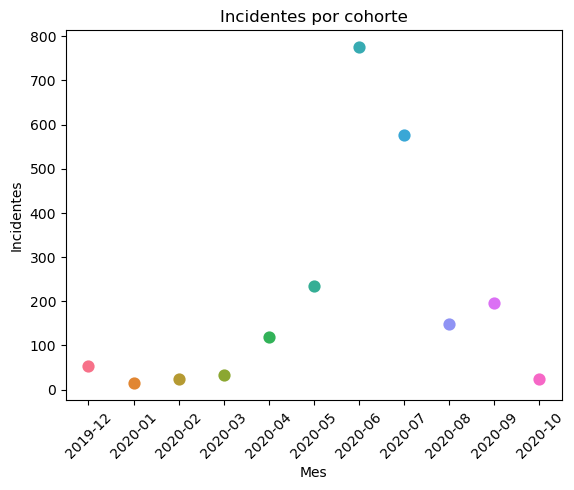

In [52]:
#2d. Visualizar tasa de incidentes por cohortes

sns.pointplot(data=df_incidencias, x='cohorte', y='incidencias', hue='cohorte', marker='o')
plt.title('Incidentes por cohorte')
plt.xlabel('Mes')
plt.ylabel('Incidentes')
plt.xticks(rotation=45)
plt.show()

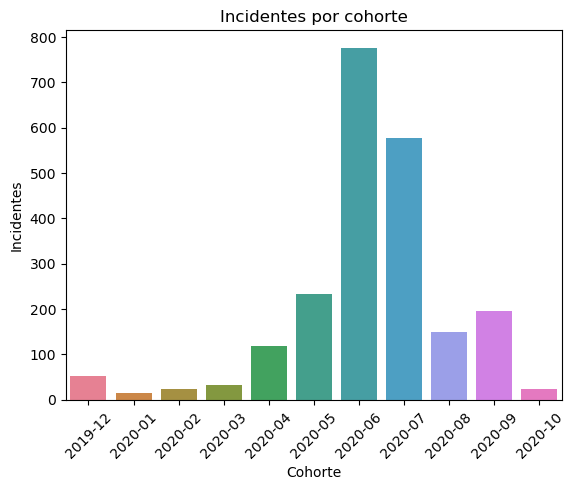

In [53]:
sns.barplot(data=df_incidencias, x='cohorte', y='incidencias', hue='cohorte')
plt.title('Incidentes por cohorte')
plt.xlabel('Cohorte')
plt.ylabel('Incidentes')
plt.xticks(rotation=45)
plt.show()

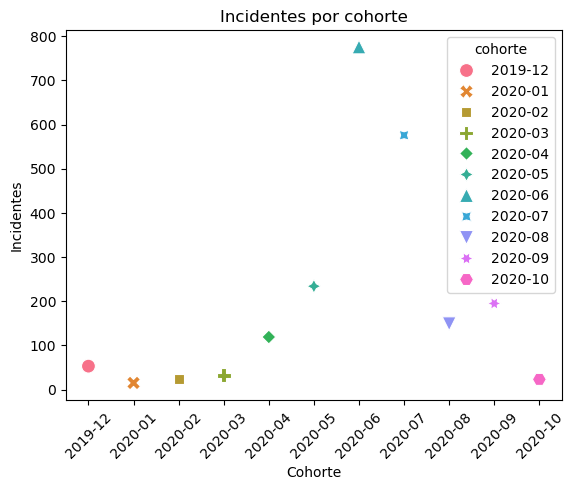

In [54]:
sns.scatterplot(data=df_incidencias, x='cohorte', y='incidencias', hue='cohorte', style='cohorte', s=100)
plt.title('Incidentes por cohorte')
plt.xlabel('Cohorte')
plt.ylabel('Incidentes')
plt.xticks(rotation=45)
plt.show()


 # Pregunta 3

Ingresos Generados por la Cohorte: Calcular el total de ingresos generados por cada cohorte a lo largo de los meses para evaluar el impacto financiero del comportamiento de los usuarios.
 

Variables a utilizar: 
 * Cohorte
 * Amount (cash)
 * total_amount (fees)
 * año_mes

Según documentación el cash.status:

Status of the CR.

Possibles values are : 
- approved : CR is a 'regular' one (= without fees) and was approved either automatically or manually. Funds will be sent aprox. 7 days after the creation
- money_sent : We transferred the fund to the customer account. Will change to active once we detect that the user received the funds (using user's bank history)
- rejected : The CR needed a manual review and was rejected
- pending : The CR is pending a manual review from an analyst
- transaction_declined : We failed to send the funds to the customer
- waiting_user_confirmation : The user needs to confirm in-app that he want the CR (for legal reasons)
- direct_debit_rejected : Our last attempt of SEPA direct debit to charge the customer was rejected 
- canceled : The user didn't confirm the cash request in-app, we automatically canceled it
- direct_debit_sent : We sent/scheduled a SEPA direct debit to charge the customer account. The result of this debit is not yet confirmed
- waiting_reimbursement : We were not able to estimate a date of reimbursement, the user needs to choose one in the app.
- active : Funds were received on the customer account.
- money_back : The CR was successfully reimbursed.

Status of the fees (= does the fees was successfully charged)

Possibles values are : 
- confirmed : the user made an action who created a fee. It will normally get charged at the moment of the CR's reimbursement. In some rare cases, postpones are confirmed without being charges due to a commercial offer.
- rejected : the last attempt to charge the fee failed.
- cancelled : fee was created and cancelled for some reasons. It's used to fix issues with fees but it mainly concern postpone fees who failed. We are charging the fees at the moment of the postpone request. If it failed, the postpone is not accepted and the reimbursement date still the same.
- accepted : fees were successfully charged

Pasos: 

3a. Crear una columna con el año_mes de paid_at 
 - Consideramos paid_at como el mes en que se produce realmente el ingres 
  - Serà necesario eliminar nulos pues no todos los anticipos habran sido pagos

3b. Obtener el valor de los ingresos generados agrupados por año_mes_ingreso y cohorte

     -el ingreso se considera la suma d:
       - las entradas de cash con status money_back
       - las entradas de fees con status accepted
    - La justificación es:
       - sólo se ha recuperado el dinero del prestamo cuando cash.status es money_back
       - sólo se ha obtenido fees de las entradas que fees.status es accepted

    - La fecha del ingreso se considera:
       - la money_back_date para cash pues según la documentación: Date where the CR was considered as money back. It's either the paid_by_card date or the date were we considered that's the direc debit have low odds to be rejected (based on business rules)
       - la paid_at de fees pues la documentación dice: Timestamp of the fee's payment

    - Algunos casos peculiares:
       - Pueden haber entradas en cash que se han ingresado (status == money_back) pero que no se le ha aplicado un fee
         Lo sabemos porque mientras en fees (limpios y cobrados) hay 14523, en cash hay 16207. Por tanto, algunos cash no tienen fee
         Consideramos que los que no tienen fees forman parte de el servicio gratuito que indica la descripción del problema.
       - Pueden haber entradas en fees que se han ingresado (status == accepted) pero que no se ha cobrado el cash
         Hemos comprobado que todos los fees cobrados (con fecha paid_at no nulo) tienen su correspondiente entrada en cash, aunque no siempre con estado money_back. Ej. 6606 tiene cash.status direct_debit_rejected, mientras que ha sido cobrado su fee.
         Consideramos en estos casos que se ha producido el ingreso del fee pero no aun (quizás nunca) el de cash
       - Puede ser que por una incidencia, se realicen más de un fee mensual sobre el mismo id. En cualquier caso, consideramos que para éste estudio nos interesa el mes de ingreso y no a qué CR corresponde. Consideramos que sigue mandando la columna paid_at y el status accepted, independientemente de las incidencias estudiadas en la métrica anterior.t

3c. Visualizar los resultados

    - dado que los datos se parecen a los de anticipos por mes de la pregunta anterior,
      los gráficos podrían ser similares en tipología.
      Seria de esperar también una similitud en la forma de los gráficos aunque desplazada
      a la derecha pues los prestamos se realizan antes que los ingresostdos

In [60]:
# 3a. Añadimos la columna año_mes_ingreso
# Primero filtramos las entradas no pagadas
cash_fees_paid = cash_fees[cash_fees['paid_at'].notna()].copy()   # Es necesario copy() para evitar el SettingWithCopyWarning
cash_fees_paid['año_mes_ingreso'] = pd.to_datetime(cash_fees_paid['paid_at'], format='mixed').dt.strftime('%Y-%m')
cash_fees_paid[cash_fees_paid['status_y'] == 'accepted']

,id_x,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,category,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment,año_mes_ingreso
0,23534,25.0,money_back,2020-10-23 15:20:26.163927+00,2020-12-18 13:08:29.099365+00,21465.0,NaN,NaN,2020-11-10 23:51:00+00,NaN,...,NaN,5.0,Instant Payment Cash Request 23534,2020-10-23 15:21:35.895711+00,2020-10-23 15:21:35.89574+00,2020-11-06 07:16:22.014422+00,NaN,NaN,after,2020-11
13,20639,50.0,money_back,2020-10-12 16:05:27.478409+00,2020-12-18 13:12:06.313275+00,NaN,NaN,30317.0,2020-10-30 23:00:00+00,2020-10-16,...,NaN,5.0,Postpone Cash Request 20639,2020-10-17 05:30:42.507784+00,2020-10-17 05:30:42.507814+00,2020-10-17 05:30:46.780335+00,2020-10-27 17:05:21.138+00,2020-10-30 23:00:00+00,before,2020-10
14,20639,50.0,money_back,2020-10-12 16:05:27.478409+00,2020-12-18 13:12:06.313275+00,NaN,NaN,30317.0,2020-10-30 23:00:00+00,2020-10-16,...,NaN,5.0,Instant Payment Cash Request 20639,2020-10-15 06:29:32.340345+00,2020-10-15 06:29:32.340366+00,2020-10-31 18:58:22.280263+00,NaN,NaN,after,2020-10
16,2211,100.0,money_back,2020-05-27 10:23:16.961762+00,2020-06-28 15:40:27.16607+00,3045.0,2020-05-27 13:07:30.446702+00,NaN,2020-07-31 22:00:00+00,2020-05-29,...,NaN,5.0,Postpone Cash Request 2211,2020-06-28 15:40:20.807831+00,2020-10-13 14:25:01.580886+00,2020-06-28 15:40:27.730873+00,2020-07-01 22:00:00+00,2020-07-31 22:00:00+00,before,2020-06
31,6606,100.0,direct_debit_rejected,2020-07-04 16:46:38.513992+00,2020-11-01 22:27:03.947487+00,28368.0,2020-07-05 18:18:01.266954+00,NaN,2020-08-30 05:34:55.649+00,2020-07-07,...,NaN,5.0,Postpone Cash Request 6606,2020-07-07 05:34:57.746068+00,2020-10-13 14:25:02.07258+00,2020-07-07 05:35:03.667748+00,2020-07-30 22:00:00+00,2020-08-15 05:34:55.649+00,before,2020-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21052,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,...,NaN,5.0,Instant Payment Cash Request 22357,2020-10-20 07:58:19.637461+00,2020-10-20 07:58:19.637491+00,2021-02-05 12:19:30.685779+00,NaN,NaN,after,2021-02
21053,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,...,NaN,5.0,Postpone Cash Request 20256,2020-10-30 17:08:16.906449+00,2020-10-30 17:08:21.967966+00,2020-10-30 17:08:21.416796+00,2020-11-06 11:00:00+00,2020-12-07 11:00:00+00,before,2020-10
21054,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,...,NaN,5.0,Instant Payment Cash Request 20256,2020-10-10 05:42:11.679401+00,2020-10-13 14:25:03.460352+00,2021-02-05 13:14:19.731397+00,NaN,NaN,after,2021-02
21055,19886,100.0,direct_debit_sent,2020-10-08 14:16:52.155661+00,2021-01-05 15:45:52.645536+00,44867.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-10,...,NaN,5.0,Postpone Cash Request 19886,2020-10-10 21:22:00.083739+00,2020-10-13 14:25:18.501716+00,2020-10-10 21:22:04.456828+00,2020-11-06 22:00:00+00,2020-12-06 11:00:00+00,before,2020-10


In [61]:
fees[(fees['status'] == 'accepted') & (fees['paid_at'].notna())]

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after
5,17029,24052.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 24052,2020-10-24 12:22:27.666102+00,2020-10-24 12:22:27.666124+00,2020-11-09 19:10:14.47407+00,NaN,NaN,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20997,12867,20616.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 20616,2020-10-12 13:54:28.690344+00,2020-10-13 14:25:18.882201+00,2021-02-06 20:17:49.314469+00,NaN,NaN,after
21002,15712,17921.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-21 22:22:56.19283+00,2020-10-21 22:22:56.192851+00,2021-02-08 03:14:56.324535+00,NaN,NaN,after
21009,14209,15088.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-16 23:49:42.0478+00,2020-10-16 23:49:42.04783+00,2021-02-07 03:10:48.554195+00,NaN,NaN,after
21039,18244,12520.0,incident,accepted,month_delay_on_payment,5.0,month delay on payment - 10/2020,2020-10-27 00:16:30.736241+00,2020-10-27 00:16:30.736269+00,2021-02-12 04:15:27.825054+00,NaN,NaN,after


In [62]:
cash[(cash['status'] == 'money_back') & (cash['money_back_date'].notna())]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,año_mes,unified_user_id,cohorte
5,2145,100.0,money_back,2020-05-23 20:58:55.129432+00,2020-07-06 03:36:03.023911+00,9489.0,2020-05-24 12:40:33.05491+00,NaN,2020-06-06 22:00:00+00,2020-05-26,2020-07-06 03:36:03.023521+00,regular,NaN,completed,2020-06-12 22:27:04.837525+00,2020-07-06 03:36:03.030904+00,2020-05,9489.0,2020-05
11,1794,100.0,money_back,2020-05-14 21:11:47.393326+00,2020-06-03 05:11:35.312872+00,778.0,2020-05-15 09:11:17.272832+00,NaN,2020-05-29 21:11:46.695+00,2020-05-17,2020-06-03 05:11:35.312616+00,regular,NaN,completed,2020-05-29 21:21:01.362364+00,2020-06-03 05:11:35.319122+00,2020-05,778.0,2019-12
13,2122,100.0,money_back,2020-05-22 12:47:42.741369+00,2020-06-13 06:36:34.188372+00,8218.0,2020-05-23 14:29:15.376466+00,NaN,2020-06-15 22:00:00+00,2020-05-27,2020-06-13 06:36:34.188042+00,regular,NaN,NaN,NaN,NaN,2020-05,8218.0,2020-04
43,1629,100.0,money_back,2020-05-08 11:02:44.881355+00,2020-06-10 08:20:10.399242+00,9068.0,2020-05-08 11:07:03.575647+00,NaN,2020-06-03 22:00:00+00,2020-05-12,2020-06-10 08:20:10.398977+00,regular,NaN,NaN,NaN,NaN,2020-05,9068.0,2020-05
48,23534,25.0,money_back,2020-10-23 15:20:26.163927+00,2020-12-18 13:08:29.099365+00,21465.0,NaN,NaN,2020-11-10 23:51:00+00,NaN,2020-11-06 07:16:21.845479+00,instant,2020-10-23 15:21:26.878525+00,NaN,NaN,NaN,2020-10,21465.0,2020-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23964,16834,100.0,money_back,2020-09-19 07:37:14.351567+00,2021-02-05 12:11:58.186458+00,20064.0,2020-09-19 15:37:54.670099+00,NaN,2020-10-05 22:00:00+00,2020-09-22,2021-02-05 12:11:58.131036+00,instant,2020-09-26 07:37:14.299162+00,completed,2020-10-15 22:27:12.949488+00,2021-02-05 12:11:58.134306+00,2020-09,20064.0,2020-06
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN,2020-10,13681.0,2020-06
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00,2020-10,30367.0,2020-10
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN,2020-10,82122.0,2020-10


In [63]:
# merge de cash y fees para calcular ingresos
# Nos interesa que no hayan entradas de fees que no esten en cash porque si no no disponemos de cohorte (user_id)
# Escogemos how='left' porque 'outer' nos entrega 4 entradas de fees que no están en cash, y no nos interesan pues
# no podremos asociarlas a ningún user_id, ni por tanto, a ningún cohorte.

# No podemos filtrar las entradas no correctas de cash aun porqué corremos el riesgo de perder alguna entrada en
# fees que quedaría ingresada pero no contabilizada.
merge_ingresos_raw = pd.merge(cash, fees, left_on='id', right_on='cash_request_id', how='left')
seleccion = merge_ingresos_raw[['status_x', 'status_y', 'amount', 'total_amount', 'cohorte', 'paid_at', 'money_back_date']]
seleccion.sample(10)


,status_x,status_y,amount,total_amount,cohorte,paid_at,money_back_date
1111,money_back,NaN,70.0,NaN,2020-05,NaN,2020-06-10 23:50:10.04793+00
11105,direct_debit_rejected,rejected,100.0,5.0,2020-10,2020-11-11 11:35:47.351165+00,NaN
21561,money_back,NaN,50.0,NaN,2020-09,NaN,2020-10-02 19:01:38.884715+00
10296,money_back,NaN,100.0,NaN,2020-06,NaN,2020-07-07 15:09:42.364307+00
1378,money_back,accepted,100.0,5.0,2020-06,2020-10-05 19:43:14.236974+00,2020-10-08 22:00:00+00
28366,money_back,cancelled,100.0,5.0,2020-06,NaN,2020-11-15 13:11:15.698671+00
14209,money_back,NaN,100.0,NaN,2020-06,NaN,2020-08-04 22:00:00+00
27217,money_back,accepted,100.0,5.0,2020-10,2020-11-06 19:35:44.991198+00,2020-11-06 19:35:44.96184+00
17103,money_back,NaN,100.0,NaN,2020-05,NaN,2020-08-09 22:00:00+00
22079,money_back,accepted,50.0,5.0,2020-08,2020-09-04 07:00:59.478409+00,2020-09-04 07:00:59.292618+00


In [64]:
# Selección de entradas correspondientes a cash
seleccion_cash_raw = seleccion[['status_x', 'amount', 'cohorte', 'money_back_date']]
# Limpiamos posibles entradas con datos nulos
seleccion_cash = seleccion_cash_raw[(seleccion_cash_raw['status_x'] == 'money_back') &
                                    (seleccion_cash_raw['amount'].notna()) &
                                    (seleccion_cash_raw['cohorte'].notna()) &
                                    (seleccion_cash_raw['money_back_date'].notna())].copy()  # copy para poder añadir más columnas
seleccion_cash.head()

,status_x,amount,cohorte,money_back_date
5,money_back,100.0,2020-05,2020-07-06 03:36:03.023521+00
11,money_back,100.0,2019-12,2020-06-03 05:11:35.312616+00
13,money_back,100.0,2020-04,2020-06-13 06:36:34.188042+00
43,money_back,100.0,2020-05,2020-06-10 08:20:10.398977+00
48,money_back,25.0,2020-09,2020-11-06 07:16:21.845479+00


In [65]:
# Añadir columna año_mes
seleccion_cash['año_mes'] = pd.to_datetime(seleccion_cash['money_back_date'], format='mixed').dt.strftime('%Y-%m')
seleccion_cash

,status_x,amount,cohorte,money_back_date,año_mes
5,money_back,100.0,2020-05,2020-07-06 03:36:03.023521+00,2020-07
11,money_back,100.0,2019-12,2020-06-03 05:11:35.312616+00,2020-06
13,money_back,100.0,2020-04,2020-06-13 06:36:34.188042+00,2020-06
43,money_back,100.0,2020-05,2020-06-10 08:20:10.398977+00,2020-06
48,money_back,25.0,2020-09,2020-11-06 07:16:21.845479+00,2020-11
...,...,...,...,...,...
32087,money_back,50.0,2020-10,2020-12-01 13:26:53.787672+00,2020-12
32088,money_back,100.0,2020-10,2021-02-05 12:19:30.626289+00,2021-02
32089,money_back,100.0,2020-10,2021-02-05 12:19:30.626289+00,2021-02
32090,money_back,100.0,2020-10,2021-02-05 13:14:19.689906+00,2021-02


In [66]:
# Calcular ingresos por cash agrupados por año-mes (de money_back_date) y cohorte
ingresos_cash = seleccion_cash.groupby(['año_mes', 'cohorte'])['amount'].sum()
ingresos_cash

año_mes  cohorte
2020-02  2019-12     100.0
2020-03  2019-12    3975.0
         2020-01    1700.0
         2020-02    2230.0
         2020-03     310.0
                     ...  
2021-02  2020-07    4130.0
         2020-08     440.0
         2020-09    4575.0
         2020-10    5950.0
         2020-11     150.0
Name: amount, Length: 110, dtype: float64

In [67]:
# Selección de entradas correspondientes a fees
seleccion_fees_raw = seleccion[['status_y', 'total_amount', 'cohorte', 'paid_at']]
# Limpiamos posibles entradas con datos nulos
seleccion_fees = seleccion_fees_raw[(seleccion_fees_raw['status_y'] == 'accepted') &
                                    (seleccion_fees_raw['total_amount'].notna()) &
                                    (seleccion_fees_raw['cohorte'].notna()) &
                                    (seleccion_fees_raw['paid_at'].notna())].copy()    # copy para poder añadir más columnas
seleccion_fees.head()

,status_y,total_amount,cohorte,paid_at
48,accepted,5.0,2020-09,2020-11-06 07:16:22.014422+00
170,accepted,5.0,2020-07,2020-10-17 05:30:46.780335+00
171,accepted,5.0,2020-07,2020-10-31 18:58:22.280263+00
233,accepted,5.0,2020-02,2020-06-28 15:40:27.730873+00
330,accepted,5.0,2020-07,2020-07-07 05:35:03.667748+00


In [68]:
# Añadir columna año_mes
seleccion_fees['año_mes'] = pd.to_datetime(seleccion_fees['paid_at'], format='mixed').dt.strftime('%Y-%m')
seleccion_fees

,status_y,total_amount,cohorte,paid_at,año_mes
48,accepted,5.0,2020-09,2020-11-06 07:16:22.014422+00,2020-11
170,accepted,5.0,2020-07,2020-10-17 05:30:46.780335+00,2020-10
171,accepted,5.0,2020-07,2020-10-31 18:58:22.280263+00,2020-10
233,accepted,5.0,2020-02,2020-06-28 15:40:27.730873+00,2020-06
330,accepted,5.0,2020-07,2020-07-07 05:35:03.667748+00,2020-07
...,...,...,...,...,...
32089,accepted,5.0,2020-10,2021-02-05 12:19:30.685779+00,2021-02
32090,accepted,5.0,2020-10,2020-10-30 17:08:21.416796+00,2020-10
32091,accepted,5.0,2020-10,2021-02-05 13:14:19.731397+00,2021-02
32092,accepted,5.0,2020-09,2020-10-10 21:22:04.456828+00,2020-10


In [69]:
# Calcular ingresos por fees agrupados por año-mes (de paid_at) y cohorte
ingresos_fees = seleccion_fees.groupby(['año_mes', 'cohorte'])['total_amount'].sum()
ingresos_fees

año_mes  cohorte
2020-06  2019-12     10.0
         2020-01     10.0
         2020-02     20.0
         2020-03     20.0
         2020-04     45.0
                    ...  
2021-02  2020-07    140.0
         2020-08     15.0
         2020-09    130.0
         2020-10    285.0
         2020-11      5.0
Name: total_amount, Length: 93, dtype: float64

In [70]:
# Tenemos dos Series con el mismo index (año-mes y cohorte) y un valor asociado.
# Queremos sumar los valores que coinciden en índice y los que no, que se quede el valor existente
total_ingresos_series = ingresos_cash.add(ingresos_fees, fill_value=0)
total_ingresos_series


año_mes  cohorte
2020-02  2019-12     100.0
2020-03  2019-12    3975.0
         2020-01    1700.0
         2020-02    2230.0
         2020-03     310.0
                     ...  
2021-02  2020-07    4270.0
         2020-08     455.0
         2020-09    4705.0
         2020-10    6235.0
         2020-11     155.0
Length: 112, dtype: float64

In [71]:
total_ingresos = total_ingresos_series.to_frame(name='ingresos').reset_index()
total_ingresos

,año_mes,cohorte,ingresos
0,2020-02,2019-12,100.0
1,2020-03,2019-12,3975.0
2,2020-03,2020-01,1700.0
3,2020-03,2020-02,2230.0
4,2020-03,2020-03,310.0
...,...,...,...
107,2021-02,2020-07,4270.0
108,2021-02,2020-08,455.0
109,2021-02,2020-09,4705.0
110,2021-02,2020-10,6235.0


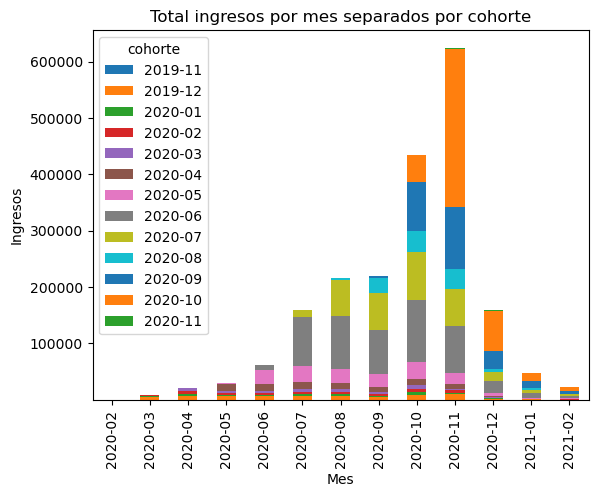

In [72]:
# 3c. Visualizar resultados
df_pivot = total_ingresos.pivot(index='año_mes', columns='cohorte', values='ingresos').fillna(0)
df_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Mes')
plt.ylabel('Ingresos')
plt.title('Total ingresos por mes separados por cohorte')
plt.show()

In [73]:
#Como esperabamos las columnas muestran una distribución similar a las entradas pero desplazadas en el tiempo, pues son pagadas después del adelanto. 

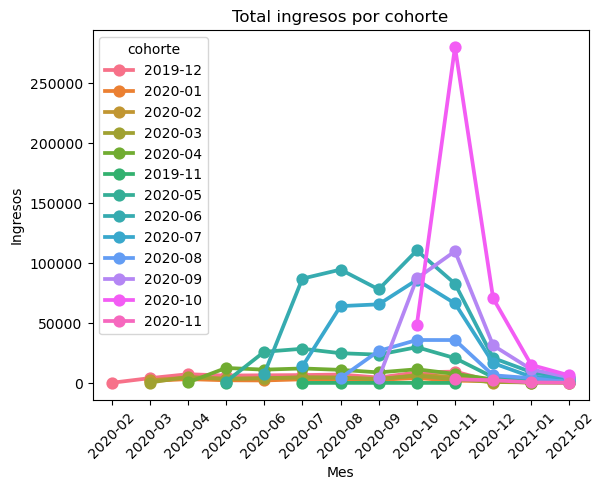

In [74]:
sns.pointplot(data=total_ingresos, x='año_mes', y='ingresos', hue='cohorte', marker='o')
plt.title('Total ingresos por cohorte')
plt.xlabel('Mes')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)
plt.show()

# Pregunta 04

Nueva Métrica Relevante: Proponer y calcular una nueva métrica relevante que brinde perspectivas adicionales sobre el comportamiento de los usuarios o el rendimiento de los servicios de IronHack Payments.

Propuestas: 

  - Métrica acerca del tipo de cliente. Clasificandolos dependiendo de la cantidad de adelantos solicitados, Usuarios ocasionales (una vez), recurrentes (dosveces) y frecuentes (> mayor  a 2). 

Tipo de Cliente.

Podemos también deducir cantidad de adelantos que ha ejecutado el cliente para poder realizar un tipo de clasificación segun la frecuencia de uso en la plataforma de Ironhack. 

Objetivo:

Queremos ver la evolucion del tiempo que tarda el cliente en pagar el adelanto (sin incluir las fees).  

Variables: 

 - created_at
 - money_back_date
 - amount
 - 
Pasos.

4a. Confirmar que las variables 

In [78]:
#Estudiaremos la clasificación de los clientes.

user_class = cash.groupby('unified_user_id')['año_mes'].count()     
print("Adelantos por usuario")
print(user_class.head(10))

Adelantos por usuario
unified_user_id
34.0     1
35.0     7
47.0     8
52.0     4
53.0     4
66.0     1
68.0     1
70.0     1
72.0    12
73.0     7
Name: año_mes, dtype: int64


In [79]:
#comprobamos 
adelantos_usuario_231 = user_class.loc[231]
print(f"Adelantos del usuario 231: {adelantos_usuario_231}")

Adelantos del usuario 231: 10


In [80]:
# Crear una nueva columna 'clasificacion' según la cantidad de adelantos
user_class = cash.groupby('unified_user_id')['año_mes'].count().reset_index(name='adelantos')

# Clasificación según el número de adelantos
user_class['clasificacion'] = pd.cut(user_class['adelantos'], 
                                     bins=[0, 1, 2, float('inf')], 
                                     labels=['Ocasional', 'Recurrente', 'Frecuente'])

# Mostrar los primeros resultados
print(user_class.sample(20))

       unified_user_id  adelantos clasificacion
11379          96278.0          1     Ocasional
10513          88714.0          1     Ocasional
5080           32036.0          1     Ocasional
494             2414.0          2    Recurrente
8286           65765.0          1     Ocasional
9601           80883.0          1     Ocasional
1412            6567.0          8     Frecuente
4203           24094.0          6     Frecuente
1028            4604.0          4     Frecuente
3467           19040.0          2    Recurrente
1005            4494.0          1     Ocasional
4902           30364.0          2    Recurrente
8002           61378.0          1     Ocasional
5014           31380.0          4     Frecuente
9565           80632.0          1     Ocasional
2638           13642.0          2    Recurrente
2036            9832.0          5     Frecuente
161              835.0          1     Ocasional
166              851.0          3     Frecuente
5707           35906.0          4     Fr

In [81]:
user_class.describe()

,unified_user_id,adelantos
count,11793.000000,11793.000000
mean,43663.025693,2.032562
std,31066.515456,1.850352
min,34.000000,1.000000
25%,15578.000000,1.000000
50%,37283.000000,1.000000
75%,72720.000000,2.000000
max,103719.000000,21.000000


In [82]:
user_class['adelantos'].unique()

array([ 1,  7,  8,  4, 12,  3,  6, 10, 11,  2,  5, 15,  9, 14, 17, 13, 21,
       19, 16, 18], dtype=int64)

In [83]:
user_class[user_class['adelantos']>0].describe()

,unified_user_id,adelantos
count,11793.000000,11793.000000
mean,43663.025693,2.032562
std,31066.515456,1.850352
min,34.000000,1.000000
25%,15578.000000,1.000000
50%,37283.000000,1.000000
75%,72720.000000,2.000000
max,103719.000000,21.000000


La desviacion estandar nos describe un poco el comportamiento de la distribución. Es por estos valores que hemos decidido realizar la clasificación de iguales a uno (50%), iguales a dos (75%) y mayor a 2 (el ultimo percentil de 25%)

In [85]:
cash = cash.merge(user_class[['unified_user_id', 'clasificacion']], on='unified_user_id',how='left')

print(cash.head(5))

     id  amount    status                     created_at  \
0     5   100.0  rejected  2019-12-10 19:05:21.596873+00   
1    70   100.0  rejected   2019-12-10 19:50:12.34778+00   
2     7   100.0  rejected   2019-12-10 19:13:35.82546+00   
3    10    99.0  rejected  2019-12-10 19:16:10.880172+00   
4  1594   100.0  rejected  2020-05-06 09:59:38.877376+00   

                      updated_at  user_id                   moderated_at  \
0   2019-12-11 16:47:42.40783+00    804.0  2019-12-11 16:47:42.405646+00   
1  2019-12-11 14:24:22.900054+00    231.0  2019-12-11 14:24:22.897988+00   
2  2019-12-11 09:46:59.779773+00    191.0  2019-12-11 09:46:59.777728+00   
3  2019-12-18 14:26:18.136163+00    761.0  2019-12-18 14:26:18.128407+00   
4   2020-05-07 09:21:55.34008+00   7686.0  2020-05-07 09:21:55.320193+00   

   deleted_account_id             reimbursement_date  \
0                 NaN  2020-01-09 19:05:21.596363+00   
1                 NaN   2020-01-09 19:50:12.34778+00   
2             

In [86]:
clasificacion_suma_count = cash[cash['status'] == 'money_back'].groupby('clasificacion', observed=False)['amount'].count()

In [87]:
# Crear el gráfico de torta
plt.figure(figsize=(7, 7))
plt.pie(clasificacion_suma_count, labels=clasificacion_suma.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])

# Añadir el título
plt.title('Distribución de Adelantos por Clasificación')

# Mostrar el gráfico
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()

NameError: name 'clasificacion_suma' is not defined

<Figure size 700x700 with 0 Axes>

In [ ]:
clasificacion_suma = cash[cash['status'] == 'money_back'].groupby('clasificacion', observed=False)['amount'].sum()

In [ ]:
# Crear el gráfico de torta
plt.figure(figsize=(7, 7))
plt.pie(clasificacion_suma, labels=clasificacion_suma.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])

# Añadir el título
plt.title('Distribución de Adelantos por Clasificación')

# Mostrar el gráfico
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()

In [ ]:
#eliminando el outlayer (cohorte 2020-10)
clasificacion_suma_sinoutlayer = cash[(cash['status'] == 'money_back') & (cash['cohorte'] != '2020-10')].groupby('clasificacion', observed=False)['amount'].sum()


In [ ]:
# Crear el gráfico de torta
plt.figure(figsize=(7, 7))
plt.pie(clasificacion_suma_sinoutlayer, labels=clasificacion_suma.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])

# Añadir el título
plt.title('Distribución de Adelantos por Clasificación')

# Mostrar el gráfico
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()

Hemos clasificado los usuarios en tres clases: ocasionales (1 pedido), recurrentes (2 pedidos), frecuentes (3 o más) ya que hemos visto que hasta el 50% el número de pedidos es 1, hasta el 75% es 2, y el resto se llevan el 25% restante 
(3 a 21)
Observamos en el diagrama de pastel que los usuarios frecuentes no llegan a superar a los otros dos, aun por poco. Ésto pasa tanto contando como en cantidad solicitada ya que la cantidad de los pedidos és similar. 
Sin embargo, al eliminar los usuarios de la última cohorte, que no han tenido tiempo para ser recurrentes, encontramos que los usuarios más frecuentes superan la mayoría.